In [1]:
import sys
sys.path.append('../')
import src.bars as bars
import src.ticksDB as ticksDB

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()

# Get the bars
time_bars = bars.timeBars('USA500.IDX', '2021-02-01', '2021-02-10', tickDB, 'minute')
time_bars = time_bars.get_ask_bars()
time_bars.head()

,minu,max_ask_price,min_ask_price,total_ask_volume,open_price,close_price
0,2021-02-01 00:00:00,3687.067,3684.251,0.21819,3684.367,3685.487680
1,2021-02-01 00:01:00,3686.546,3684.301,0.26539,3686.066,3685.409462
2,2021-02-01 00:02:00,3687.046,3685.257,0.21804,3685.858,3686.019379
3,2021-02-01 00:03:00,3687.361,3685.355,0.20551,3685.355,3686.710172
4,2021-02-01 00:04:00,3687.367,3686.701,0.21763,3686.951,3687.077286


In [2]:
# Great, now we have the bars. Let's label them.


# Import the labeler
from src.labeling import barHorizonLabeler
barHorizonLabeler = barHorizonLabeler(time_bars, 5)
barHorizonLabeler.label(epsilon=0.0001, debug=True)

## This epsilon parameter is the threshold for labeling. If the return is greater than epsilon, then the label is 1. If the return is less than -epsilon, then the label is -1. If the return is between -epsilon and epsilon, then the label is 0.
## The results are very sensitive to this parameter. If we set epsilon to 0.1, then the labels are all 0. If we set epsilon to 0.0001, then the labels are 1 and -1.


In [3]:
time_bars.head()

,minu,max_ask_price,min_ask_price,total_ask_volume,open_price,close_price,label
0,2021-02-01 00:00:00,3687.067,3684.251,0.21819,3684.367,3685.487680,1.0
1,2021-02-01 00:01:00,3686.546,3684.301,0.26539,3686.066,3685.409462,0.0
2,2021-02-01 00:02:00,3687.046,3685.257,0.21804,3685.858,3686.019379,1.0
3,2021-02-01 00:03:00,3687.361,3685.355,0.20551,3685.355,3686.710172,0.0
4,2021-02-01 00:04:00,3687.367,3686.701,0.21763,3686.951,3687.077286,-1.0


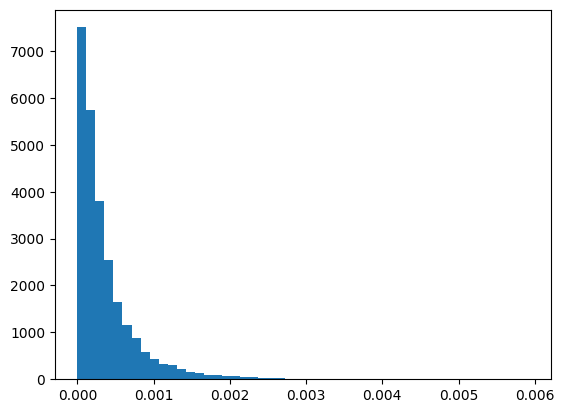

In [4]:
## This is a distribution of the returns - this can help set epsilon, though in practice this would have to be done with historical data.
## I'm cheating here. I'm using the returns from the labeling process to plot the distribution. In practice, you would have to use historical data to set epsilon.

import numpy as np
import matplotlib.pyplot as plt
rets_values = np.array(barHorizonLabeler.rets_values)
plt.hist(np.abs(rets_values), bins=50)
plt.show()

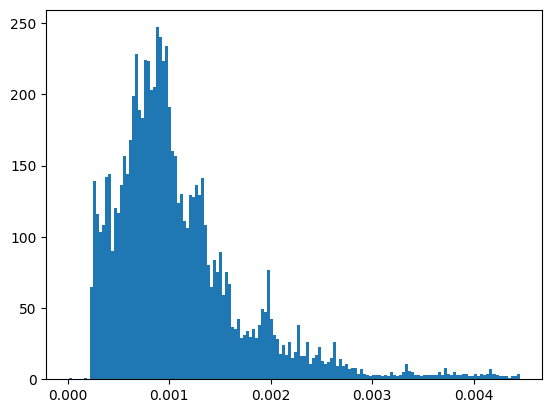

In [1]:
import sys
sys.path.append('../')
import src.bars as bars
import src.ticksDB as ticksDB
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
tickDB = ticksDB.ticksDB()
tickDB.connect()
from src.labeling import tripleBarrierLabeler

# Get the bars
time_bars = bars.timeBars('USA500.IDX', '2021-02-01', '2021-02-10', tickDB, 'minute')
time_bars = time_bars.get_ask_bars()
time_bars.head()

time_bars.index = time_bars["minu"]
tripleBarrier = tripleBarrierLabeler(time_bars)
dailyVolt = tripleBarrier.getDailyVolatility()
plt.hist(np.abs(dailyVolt), bins=150)
plt.show()

In [2]:
c = tripleBarrier.label(upFactor=2, downFactor=2)
c.describe()

100%|██████████| 7922/7922 [00:25<00:00, 316.23it/s]


,max_ask_price,Volatility,UpperBarrier,LowerBarrier,min_ask_price,total_ask_volume,open_price,close_price,label
count,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000
mean,3865.643909,0.001095,3873.659391,3856.775896,3864.773025,0.088527,3865.210305,3865.217644,0.131785
std,38.611875,0.000665,36.737742,41.203745,38.797181,0.084037,38.705864,38.701859,0.899327
min,3769.558000,0.000010,3775.402650,3757.249791,3768.246000,0.000004,3768.246000,3768.913793,-1.000000
25%,3837.658750,0.000665,3846.125436,3825.726658,3836.746000,0.035580,3837.167000,3837.190849,-1.000000
50%,3870.658000,0.000938,3876.933336,3860.257105,3869.849000,0.064600,3870.128000,3870.218589,0.000000
75%,3902.967000,0.001331,3906.641976,3898.440487,3902.355000,0.109600,3902.701000,3902.724069,1.000000
max,3919.958000,0.004454,3930.848447,3914.681181,3918.449000,0.869400,3918.646000,3918.616217,1.000000
